In [2]:
from artnetmodel import ArtNetModel
from PIL import Image, ImageDraw

DEBUG:artnetmodel.artnetmodel:Loading from model/ArtNet.pth
DEBUG:artnetmodel.artnetmodel:Ok predicting from <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1391x1600 at 0x7FA4CAF3CF50>
DEBUG:artnetmodel.artnetmodel:Bboxes tensor([[2.2508e+02, 1.7323e+01, 1.1781e+03, 1.5609e+03],
        [2.2516e+01, 6.8704e+02, 4.0514e+02, 1.5911e+03],
        [9.6786e+02, 0.0000e+00, 1.3666e+03, 7.1349e+02],
        ...,
        [0.0000e+00, 1.4044e+03, 6.0774e+01, 1.5400e+03],
        [1.0674e+03, 1.5218e+03, 1.2099e+03, 1.5997e+03],
        [9.5145e-01, 2.3112e+02, 6.1057e+01, 3.9388e+02]])
DEBUG:artnetmodel.artnetmodel:Classes tensor([ 1,  1,  1,  ..., 20, 20, 20], dtype=torch.int32)
DEBUG:artnetmodel.artnetmodel:Probs tensor([5.1765e-05, 4.6073e-09, 2.2974e-09,  ..., 4.9104e-09, 2.1866e-08,
        1.0113e-08])
DEBUG:artnetmodel.artnetmodel:Probs distribution ['▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁

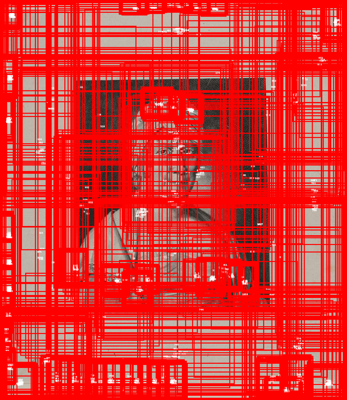

In [6]:
anm = ArtNetModel('model/ArtNet.pth')
img = Image.open('data/images/sample-next5000/1180000047_object.jpg')
boxes, classes, probs = anm.predict(img)


# dataset[0]
# im, target = dataset[0]
draw = ImageDraw.Draw(img)
for i, box in enumerate(boxes):
  # print(i, box.tolist())
  draw.rectangle(box.tolist(), outline=(255,0,0), width=4)
  draw.text(box.reshape((2,2)).mean(dim=0).tolist(), str(i))

img.resize((img.width//4, img.height//4))
